# Importing necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

# Read the dataset

In [30]:
data = pd.read_excel(r"C:\Users\VIPIN\Desktop\DSA_ICTAK\Assignment\ASSIGNMENT.7\iris.xls")

# Shape of the dataset

In [31]:
data.shape

(150, 5)

# Columns in dataset

In [32]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# Basic information of dataset

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Summary Statistics

In [34]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# First 5 rows of dataset

In [35]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Find missing values

In [36]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Handling missing values

In [37]:
col = ['SL','SW','PL']

for i in col:
    data[i].fillna(data[i].mean(),inplace=True)

# Checking missing values if there is any

In [38]:
data.isna().sum().sum()

0

# Relative frequency of each class in Classification column

In [39]:
data['Classification'].value_counts(normalize = True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Classification, dtype: float64

# Standard Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
data1 = data.drop('Classification', axis=1)
data1.head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.855944,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [42]:
data1 = scaler.fit_transform(data1)
type(data1)

numpy.ndarray

In [43]:
data1 = pd.DataFrame(data1, columns=['SL', 'SW', 'PL', 'PW'])

In [44]:
data1.describe()

,SL,SW,PL,PW
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,3.315866e-16,-3.789561e-16,-1.421085e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.930976e+00,-2.495522e+00,-1.602734e+00,-1.444450e+00
25%,-8.140476e-01,-5.929136e-01,-1.253839e+00,-1.181504e+00
50%,-6.942837e-02,-1.172615e-01,2.580365e-01,1.332259e-01
75%,6.751909e-01,5.367602e-01,7.813782e-01,7.905908e-01
max,2.536739e+00,3.212303e+00,1.828062e+00,1.710902e+00


# Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [47]:
data1['Classification'] = le.fit_transform(data['Classification'])

In [48]:
data1.head()

,SL,SW,PL,PW,Classification
0,-0.938151,1.071869,-1.370138,-1.312977,0
1,-1.186357,-0.117261,-1.370138,-1.312977,0
2,0.000000,0.358391,-1.428287,-1.312977,0
3,-1.558667,0.120565,-1.311989,-1.312977,0
4,-1.062254,1.309695,-1.370138,-1.312977,0


In [49]:
data1['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

# Splitting the dataset into features (x) and target (y)

In [51]:
x = data1.drop('Classification', axis=1)
y = data1['Classification']

# Split data into training and testing sets

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# Train the logistic regression model

In [ ]:
log_model = LogisticRegression()

log_model.fit(x_train, y_train)

# Make predictions

In [54]:
pred = log_model.predict(x_test)

# Evaluate the performance

In [55]:
print('accuracy = ', accuracy_score(y_test, pred))
print('precision = ', precision_score(y_test, pred, average='macro'))
print('recall = ', recall_score(y_test, pred, average='macro'))
print('f1 score = ', f1_score(y_test, pred, average='macro'))

accuracy =  0.9666666666666667
precision =  0.9722222222222222
recall =  0.9629629629629629
f1 score =  0.9658994032395567


# Confusion matrix

In [56]:
confusion_matrix(y_test,pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p=2)
    classifier.fit(x_train, y_train)
    pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test, pred_knn)
    metric.append(acc)

# K value vs Accuracy

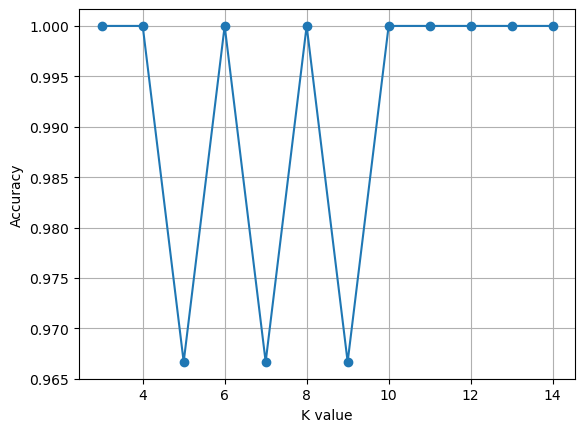

In [58]:
plt.plot(neighbors, metric, 'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()

# Make predictions

In [59]:
classifier = KNeighborsClassifier(n_neighbors=12, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)
pred_knn = classifier.predict(x_test)

# Evaluate the performance

In [63]:
print('accuracy = ', accuracy_score(y_test, pred_knn))
print('precision = ', precision_score(y_test, pred_knn, average='macro'))
print('recall = ', recall_score(y_test, pred_knn, average='macro'))
print('f1 score = ', f1_score(y_test, pred_knn, average='macro'))

accuracy =  1.0
precision =  1.0
recall =  1.0
f1 score =  1.0


# Confusion matrix

In [64]:
confusion_matrix(y_test,pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

Based on the provided results, both logistic regression and K-nearest neighbors (KNN) achieved excellent performance on the test set. However, the KNN model achieved a perfect accuracy, precision, recall, and F1 score.